## Code by Maisa M A D Maciel and Rubens C Toledo
## 2022

this code takes the .csv exports from the scopus data base and the WOS database and makes the following correlations
1. comparações das palavras chaves
Quais palavras chaves tem mais citações
Quais as pc mais utilizadas

2. cálculo de performance do paper
quais os Países que tem mais citações totais
vs. 
quais autores tem mais citações totais 
vs.
quais as universidades que tem mais citações totais
número de documentos totais vs. numero de citações totais

3. trabalhos mais relevantes
quais são os 10 trabalhos mais citados
    % impacto desses trabalhos no total
    trabalhos mais citados nos ultimos 5 anos
    havaliação das conclusões
    *desafios científicos e economicos*
    *scientific gaps*
4. Avaliação dos institutos mais importantes

## Merge os bancos de dados

1. Adicionar o banco de dados da SCOPUS ao DF;

2. Separar os países da aba "Affiliations" e adicionar como coluna na DF;

3. Adicionar o banco de dados da WOS a um novo DF;

4. Utilizar o for de incluir o source para WOS

5. Utilizar a função de *retirar iguais* para eliminar os países repetidos nos DF;

6. Filtrar as "Affiliations" e países dentro de "Address" do DF do WOS;

7. Adicionar as colunas "Affiliations" e "country" ao DF do WOS;

8. Renomear e reorganizar as colunas do DF do WOS conforme SCOPUS;

9. Utilizar o pd.concat para unir os banco de dados (exemplo na aba Merge).

In [23]:
import pandas as pd
import numpy as np
import re
pd.set_option("display.max_rows", None , "display.max_columns", None)
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.image import NonUniformImage

font='Calibri'
x_size =26
y_size =26
z_size = 24
x_tick_size=18
y_tick_size=16
z_tick_size=18

# SCOPUS
Seção dedicada a formatação do banco de dados da SCOPUS

In [24]:
#opening the scopus table

#Exclusão das colunas que não serão utilizadas na análise e formação do banco de dados
#dfs = pd.read_csv('scopus_manual.csv')
#dfs = pd.read_csv('scopus_total.csv')
dfs = pd.read_csv('scopus_manual.csv')
#dfs = pd.read_csv('scopus_variable_axial.csv')
#dfs = pd.read_csv('scopus_variable_stiffness.csv')
#dfs = pd.read_csv('scopus_variable_angle.csv')
dfs.drop(columns = ['Author(s) ID','Volume','Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Link',
                    'Authors with affiliations','Molecular Sequence Numbers','Chemicals/CAS', 'Tradenames',
                    'Manufacturers', 'Editors','Funding Details', 'Funding Text 1', 'Funding Text 2', 'Funding Text 3',
                    'Sponsors', 'Publisher', 'Conference name', 'Conference date', 'Conference location', 
                    'Conference code','Correspondence Address', 'ISSN', 'CODEN','ISBN', 'PubMed ID', 
                    'Language of Original Document', 'Publication Stage','Document Type','EID',
                    'Abbreviated Source Title'],inplace = True)

#RUBESN parece que as colunas das nossas fontes sao diferentes
#
#

#---------------- separa os países da aba afiliação e devolve para df como coluna --------------#
w = []
x = []
for c in range(len(dfs['Affiliations'].values)):  
    a = dfs['Affiliations'].values[c]
    x = a.split(';')
    y = []
    w.append([])
    for d in range(len(x)):
        y.append(x[d].split(', '))
    for b in range(len(y)):
        m = y[b][-1]
        w[c].append(str(m))
    # ALTERAÇÃO PARA RETIRADA DOS PAÍSES IGUAIS POR SET  
    for i in range (len(w)):
        w[i] = list(set(w[i]))
    #------------x----------------------x-------------#  
dfs['Country'] = [str(x)[2:-1].replace("'", "") for x in w]
#------------x--------------------------------x------------------#
dfs = dfs[['Authors', 'Title', 'Year', 'Source title', 'Cited by', 'DOI', 'Affiliations', 'Abstract',
                   'Author Keywords', 'Index Keywords', 'References', 'Country', 'Source']]
#--------------------X--------------------------------------------------X------------------------#
dfs.head(5)

,Authors,Title,Year,Source title,Cited by,DOI,Affiliations,Abstract,Author Keywords,Index Keywords,References,Country,Source
0,"Coppola A., Massa F., Montagnaro F., Scala F.",Analysis of the behaviour of limestone sorbent...,2023,Fuel,0,10.1016/j.fuel.2023.127594,Institute of Sciences and Technologies for Sus...,Sorption-Enhanced Gasification (SEG) is a prom...,Attrition; CO2 capture; Fluidised beds; Fragme...,Calcination; Calcium; Carbon dioxide; Carbonat...,"Florin, N.H., Harris, A.T., Enhanced hydrogen ...",Italy,Scopus
1,"Chai S., Li Y., Zhang W., He Z.",Simultaneous NO/CO2removal performance using C...,2022,Journal of Environmental Chemical Engineering,1,10.1016/j.jece.2022.108236,Shandong Eng. Lab. for High-efficiency Energy ...,In carbonation stage of calcium looping proces...,Calcium looping; Ce-doped CaO; CO2capture; Den...,Calcium; Carbonation; Catalysts; Charge transf...,"Mochizuki, Y., Bud, J., Byambajav, E., Tsubouc...","China, Belgium",Scopus
2,"Haaf M., Hilz J., Peters J., Unger A., Ströhle...",Operation of a 1 MWth calcium looping pilot pl...,2020,Powder Technology,12,10.1016/j.powtec.2020.05.074,"Institute for Energy Systems and Technology, T...",The calcium looping (CaL) process is a promisi...,Calcium looping (CaL); Circulating fluidized b...,Calcination; Calcium; Calorific value; Carbon ...,"Boot-Handford, M.E., Abanades, J.C., Anthony, ...",Germany,Scopus
3,"Dong J., Tang Y., Nzihou A., Weiss-Hortala E.","Effect of steam addition during carbonation, c...",2020,Journal of CO2 Utilization,22,10.1016/j.jcou.2020.101167,Key Laboratory of Recycling and Eco-treatment ...,"Calcium looping (CaL), based on cyclic carbona...",Calcium looping; CO2capture; Cyclic carbonatio...,Calcination; Calcium oxide; Carbonation; Chemi...,"Yaashikaa, P.R., Senthil Kumar, P., Varjani, S...","France, China",Scopus
4,"Diego M.E., Arias B.",Impact of load changes on the carbonator react...,2020,Fuel Processing Technology,11,10.1016/j.fuproc.2019.106307,"CSIC-INCAR, Francisco Pintado Fe, 26, Oviedo, ...",This work analyses the performance of a Calciu...,Calcium looping; Carbonator; CO2 capture; Flex...,Calcium; Chemical reactors; Efficiency; Flue g...,"IEA, World Energy Outlook (2018); IEA, Valuing...",Spain,Scopus


# WOS

Seção dedicada a formatação do banco de dados da WOS 

In [25]:
#opening the WOS table
#dfw = pd.read_csv('savedrecs.csv')
#dfw = pd.read_csv('savedrecs_total.csv')
dfw = pd.read_csv('savedrecs_manual.csv')
#dfw = pd.read_csv('wos_variable_axial_rev')
#dfw = pd.read_csv('wos_variable_stiffness_rev')
#dfw = pd.read_csv('wos_variable_angle_rev')

dfw.drop(columns = ['Author Full Names','Publication Type','Book Authors','Book Editors','Book Group Authors',
                    'Book Author Full Names','Group Authors','Book Series Title','Book Series Subtitle',
                    'Language','Document Type', 'Conference Title','Conference Date','Conference Location',
                    'Conference Sponsor', 'Conference Host','Reprint Addresses','Email Addresses',
                    'Researcher Ids','ORCIDs','Funding Orgs', 'Funding Text','Journal Abbreviation',
                    'Journal ISO Abbreviation','Publication Date', 'Volume','WoS Categories','Publisher City',
                    'Publisher Address','ISSN','eISSN','ISBN','Issue', 'Part Number','Supplement','Special Issue',
                    'Meeting Abstract','Start Page','End Page', 'Article Number','Book DOI',
                    'Early Access Date','Number of Pages','Web of Science Index', 'Research Areas',
                    'IDS Number','UT (Unique WOS ID)','Pubmed Id','Open Access Designations',
                    'Highly Cited Status','Hot Paper Status','Date of Export','Times Cited, WoS Core',
                    '180 Day Usage Count','Since 2013 Usage Count','Publisher', 'Cited Reference Count',
                    'Affiliations'], inplace = True)


# As duas funções abaixo ajustam pra juntar com o scopus. A primeira já está organizada

#including sorce
sou = []
for i in range(len(dfw['Authors'])):
    sou.append('WoS')
dfw['Source'] = sou


#Tratando WOS para ficar igual scopus

lt_w =[]
lt_w_2 = []
for i in range(len(dfw['Authors'])):
    lt_w.append(dfw['Authors'][i].split('; '))
    for j in range(len(lt_w[i])):
        lt_w_2.append(lt_w[i][j].split(', '))
        if len(lt_w_2[j][1]) >= 2:
            lt_w[i][j]=(lt_w_2[j][0]+' '+lt_w_2[j][1][0]+'.'+lt_w_2[j][1][1]+'.')
        else:
            lt_w[i][j]=(lt_w_2[j][0]+' '+lt_w_2[j][1][0]+'.')
    lt_w_2=[]
            

#dfw['Authors'].replace('[','',regex=True, inplace=True)
#dfw['Authors'].replace(']','',regex=True, inplace=True)
#dfw['Authors'].replace("'",'',regex=True, inplace=True)

dfw['Authors'] = [str(x)[1:-1].replace("'", "") for x in lt_w]

#Troca os nomes das colunas do WOS para uma nomenclatura igual ao do scopus
dfw.rename(columns={"Article Title": "Title", "Keywords Plus": "Index Keywords",
                    "Cited References":"References","Times Cited, All Databases":"Cited by",
                    "Publication Year":"Year", "Source Title":'Source title'},inplace = True)

dfw['Addresses'].fillna(value='[o, o] o, o, o, o o, o', inplace = True)

dfw.head(1)

/tmp/ipykernel_31407/2268818706.py:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfw['Addresses'].fillna(value='[o, o] o, o, o, o o, o', inplace = True)


,Authors,Title,Source title,Author Keywords,Index Keywords,Abstract,Addresses,References,Cited by,Year,DOI,Source
0,"Coppola A., Sattari A., Montagnaro F., Scala F...",Performance of limestone-based sorbent for sor...,AICHE JOURNAL,attrition; CO2 capture; fluidized beds; gasifi...,CALCIUM-LOOPING TECHNOLOGY; CARBON-DIOXIDE CAP...,A possibility to carry out sorption-enhanced g...,"[Coppola, Antonio; Scala, Fabrizio; Salatino, ...",The financial support related to the Project M...,1,2023,10.1002/aic.17588,WoS


In [59]:
#its a hassle using wos soooooo lets remove equals now :)

def remove_equals(df, df2):
    '''
    identificando e retirando os iguais

    A função tem input dos dois dataframes a serem utilizados 
    Retorna o Dataframe sem os iguais
    '''
    s_doi = df['DOI'].values
    w_doi = df2['DOI'].values
    for x in range(len(s_doi)):
        for y in range(len(w_doi)):
            if s_doi[x] == w_doi[y]:            
                df2 = df2.drop([y], axis=0)
    return(df2)

new_dfw = remove_equals(dfs,dfw)
new_dfw.head(1)

,Authors,Title,Source title,Author Keywords,Index Keywords,Abstract,Addresses,References,Cited by,Year,DOI,Source,Country,Affiliations
0,"Coppola A., Sattari A., Montagnaro F., Scala F...",Performance of limestone-based sorbent for sor...,AICHE JOURNAL,attrition; CO2 capture; fluidized beds; gasifi...,CALCIUM-LOOPING TECHNOLOGY; CARBON-DIOXIDE CAP...,A possibility to carry out sorption-enhanced g...,"[Coppola, Antonio; Scala, Fabrizio; Salatino, ...",The financial support related to the Project M...,1,2023,10.1002/aic.17588,WoS,Italy,"Ist Sci & Tecnol Energia & Mobil Sostenibili, ..."


In [60]:
#separating the affiliations and countries from the address colunm

affiliations = []
country = []
    
for c in range(len(new_dfw['Addresses'].values)):
    a = new_dfw['Addresses'].values[c]
    b = re.split('] ', a)
    
    add = []
    for i in b:
        aux = re.split('; ',i)
        add.append(aux)
    #print(add)
    count = (len(add)-1)*2
    
    my_str = []
    for i in range(count):
        my_str.append('o')
        my_str[0] = add[0][0]
        my_str[-1] = add[-1][0]
        
    #print('my_str',my_str)
    l = 1
    m = 2
    for i in range(1,len(add)-1):
        my_str[l] = add[i][0]
        l = l+2
        my_str[m] = add[i][1]
        m = m + 2
    #print('my_str',my_str)
    affl = []
    cou = []
    for i in range(len(my_str)):
        if (i%2 != 0):
            aux = re.split(', ',my_str[i])
            
            affl.append(aux[0])
            cou.append(aux[-1])
    affiliations.append(affl)
    country.append(cou)
    #Removendo iguais
    for i in range (len(country)):
        country[i] = list(set(country[i]))

    #Trantando as tretas do WOS    
    for x in range(len(country)):
        for y in range(len(country[x])):
            if country[x][y] == 'Peoples R China':
                country[x][y] = 'China'
            if ('USA' in country[x][y]) == True:
                country[x][y] = 'United States'
            if (' ' in country[x][y]) == True:
                country[x][y] = country[x][y].strip(' ')
        
#including the affiliations and countries
#print(country)
new_dfw['Country'] = [str(x)[1:-1].replace("'", "") for x in country]
new_dfw['Affiliations'] = [str(x)[1:-1].replace("'", "") for x in affiliations] 

new_dfw.head()

,Authors,Title,Source title,Author Keywords,Index Keywords,Abstract,Addresses,References,Cited by,Year,DOI,Source,Country,Affiliations
0,"Coppola A., Sattari A., Montagnaro F., Scala F...",Performance of limestone-based sorbent for sor...,AICHE JOURNAL,attrition; CO2 capture; fluidized beds; gasifi...,CALCIUM-LOOPING TECHNOLOGY; CARBON-DIOXIDE CAP...,A possibility to carry out sorption-enhanced g...,"[Coppola, Antonio; Scala, Fabrizio; Salatino, ...",The financial support related to the Project M...,1,2023,10.1002/aic.17588,WoS,Italy,"Ist Sci & Tecnol Energia & Mobil Sostenibili, ..."
1,"Hashemi S.M., Zhou R.F., Mahinpey N.",Evaluation of MgO- and CaZrO3 -promoted CaO-ba...,CHEMICAL ENGINEERING JOURNAL,Calcium looping; Solution combustion synthesis...,CO2 CAPTURE PERFORMANCE; FLUIDIZED-BED; CALCIU...,Synthetic CaO-based sorbents stabilized with C...,"[Hashemi, Seyed Mojtaba; Zhou, Rufan; Mahinpey...",The Authors would like to acknowledge the Natu...,1,2022,10.1016/j.cej.2022.138274,WoS,Canada,Univ Calgary
2,"Li D., Wang Y., Li Z.S.",Limestone Calcination Kinetics in Microfluidiz...,CATALYSTS,limestone calcination; microfluidized bed ther...,CO2 CAPTURE; THERMAL-DECOMPOSITION; PARTICLES;...,Limestone calcination is an important part of ...,"[Li, Dan; Wang, Yang; Li, Zhenshan] Tsinghua U...",This research was supported by National Natura...,0,2022,10.3390/catal12121661,WoS,China,Tsinghua Univ
3,"Gonzalez B., Kokot-Blamey J., Fennell P.",Enhancement of CaO-based sorbent for CO2 captu...,GREENHOUSE GASES-SCIENCE AND TECHNOLOGY,calcium looping; CO(2)capture; doping; seawate...,FLUIDIZED-BED; STEAM; PERFORMANCE; CARBONATION...,Limestone can be used to generate a sorbent su...,"[Gonzalez, Belen] Univ Zaragoza, Technol Coll ...",NaN,4,2020,NaN,WoS,"Spain, England","Univ Zaragoza, Imperial Coll London, Imperial ..."
4,"Alonso M., Diego M.E., Perez C., Chamberlain J...",Biomass combustion with in situ CO2 capture by...,INTERNATIONAL JOURNAL OF GREENHOUSE GAS CONTROL,Biomass combustion; CO2 capture; Negative emis...,CALCIUM LOOPING PROCESS; EXPERIMENTAL VALIDATI...,This paper reports experimental results from a...,"[Alonso, M.; Diego, M. E.; Abanades, J. C.] IN...",NaN,42,2014,10.1016/j.ijggc.2014.08.002,WoS,Spain,"INCAR CSIC, GNF"


# Merge
Seção de união dos bancos de dados

In [61]:
#rearanjando as colunas no jeitão scopus (só utilizar momentos antes de juntar)
new_dfw = new_dfw[['Authors', 'Title', 'Year', 'Source title', 'Cited by', 'DOI', 'Affiliations', 'Abstract',
                   'Author Keywords', 'Index Keywords', 'References', 'Country', 'Source']]

# Exemplo de concatenação de banco de dados
dfc = pd.concat([dfs,new_dfw], ignore_index=True)
dfc['Cited by'].fillna(0, inplace=True) #Preenche todos os NaN com zero
dfc.fillna('', inplace=True)
dfc.head()
dfc.to_csv('df_combinado.csv', index = False)

/tmp/ipykernel_31407/2795445835.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfc['Cited by'].fillna(0, inplace=True) #Preenche todos os NaN com zero


## Biobliometric analysis

## Análise de citações por ano, trabalhos por ano e trabalhos por países

In [62]:
# Agrupa em um dicionário quantos trabalhos por cada ano sendo as key os anos
Ano = Counter(dfc['Year'].values)
Ano = dict(sorted(Ano.items(), key=lambda item: item[0])) #ordena por ano
#--------------- Arruma a quantidade de trabalho por pais ---#
lista_pais=dfc['Country'].values

lista_contagem=[]

for i in range(len(lista_pais)):
    lista_contagem = np.append(lista_contagem,lista_pais[i].split(', ')) 
lista_contagem=list(map(lambda x: x.replace("England","United Kingdom"),lista_contagem))
for j in range(len(lista_contagem)):
    
    if lista_contagem[j][0] == ' ':
        lista_contagem[j] = lista_contagem[j][1:]
    
Pais = Counter(lista_contagem)
Pais = dict(sorted(Pais.items(), key=lambda item: item[1])) #ordena por ordem de trabalho do menor para o maior
#------------------x-----------------------------x------------#

#Agrupa as citações por ano conforme a coluna Cited by
Cita = dfc.groupby('Year')['Cited by'].sum()
Cita = dict(Cita)

## Analise de publicações por pais por ano e número de citações

In [63]:
countries_values = dfc['Country'].values
d_cp={}


lista_paises=[]
for i in range(len(countries_values)):
    lista_paises=countries_values[i].split(', ')
    lista_paises=list(map(lambda x: x.replace("England","United Kingdom"),lista_paises))
    
    for j in lista_paises:
        if (j in d_cp) == True:
            d_cp.update({j:(dfc['Cited by'][i] + d_cp[j])})  
        else:
            d_cp.update({j:dfc['Cited by'][i]})
d_cp=dict(sorted(d_cp.items(), key=lambda item: item[1]))

## Analise de citações por revista, qual revista vale a pena

In [64]:
rev_cita_j = dfc['Source title'].values
rev_cita_c = dfc['Cited by'].values

rev_cita_j = [rev_cita_j.upper() for rev_cita_j in rev_cita_j]   # deixa tudo maiusculo

dfj = pd.DataFrame({'Source title':rev_cita_j, 'Cited by':rev_cita_c})

rev_cita = dfj.groupby('Source title')['Cited by'].sum()

rev_cita = dict(sorted(rev_cita.items(), key=lambda item: item[1]))

unique, counts = np.unique(rev_cita_j, return_counts=True)
rev_n = {}
for unique, counts in zip(unique, counts):
    rev_n[unique] = counts
rev_n= {k: v for k, v in sorted(rev_n.items(), key=lambda item: item[1])}


## Análise de Citações por palavra chave

Ideia inicial vai ser elencar as cinco palavras chaves que mais geraram citação para o tópico

In [65]:
d={}
kw = dfc['Author Keywords']
kw = [kw.upper() for kw in kw] # deixa tudo maiusculo

lt = []
for i in range(len(kw)):
    lt.append(kw[i].split('; '))
    
    for j in range(len(lt[i])):
        
        if (lt[i][j] in d) == True:
            
            d.update({lt[i][j]:(dfc['Cited by'][i] + d[lt[i][j]])})  
        else:
            d.update({lt[i][j]:dfc['Cited by'][i]})
d=dict(sorted(d.items(), key=lambda item: item[1]))
#del d['']

## Análise de qual Author é mais citado

# Todos os autores

In [66]:
d_a={}
dfc['Authors'] = dfc['Authors'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
aut = dfc['Authors']
aut = [aut.upper() for aut in aut] # deixa tudo maiusculo

lt = []
for i in range(len(dfc)):
    lt.append(aut[i].split(', '))
    
    for j in range(len(lt[i])):
        
        if (lt[i][j] in d_a) == True:
            
            d_a.update({lt[i][j]:(dfc['Cited by'][i] + d_a[lt[i][j]])})  
        else:
            d_a.update({lt[i][j]:dfc['Cited by'][i]})

d_a=dict(sorted(d_a.items(), key=lambda item: item[1]))

## Apenas primeiro Autor

In [67]:
d_p={}
dfc['Authors'] = dfc['Authors'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
aut = dfc['Authors']
aut = [aut.upper() for aut in aut] # deixa tudo maiusculo

lt = []
for i in range(len(dfc)):
    lt.append(aut[i].split(', '))
ca = []
for j in range(len(lt)):
    if (lt[j][0] in d_p) == True:
        #print(j)
        d_p.update({lt[j][0]:(dfc['Cited by'][j] + d_p[lt[j][0]])})  
    else:
        d_p.update({lt[j][0]:dfc['Cited by'][j]})
d_p=dict(sorted(d_p.items(), key=lambda item: item[1]))

## Apenas último autor

In [68]:
d_u={}
dfc['Authors'] = dfc['Authors'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
aut = dfc['Authors']
aut = [aut.upper() for aut in aut] # deixa tudo maiusculo

lt2 = []
for i in range(len(dfc)):
    lt2.append(aut[i].split(', '))
for j in range(len(lt)):
    if (lt2[j][-1] in d_u) == True:
        d_u.update({lt2[j][-1]:(dfc['Cited by'][j] + d_u[lt[j][-1]])})  
    else:
        d_u.update({lt2[j][-1]:dfc['Cited by'][j]})

d_u=dict(sorted(d_u.items(), key=lambda item: item[1]))

## Análise das citações dos 5 maiores autores por ano

# Todos os autores

In [69]:
ano_l = []
ano_v = []
for key, value in Ano.items() :
    ano_l.append(key)
    ano_v.append(value)
#ano_l = ano_l[::-1]

aut_l = []
aut_v = []
for key, value in d_a.items() :
    aut_l.append(key)
    aut_v.append(value)
    
aut_l = aut_l[-5:]

aut_y = dfc['Authors']
aut_y = [aut_y.upper() for aut_y in aut_y] # deixa tudo maiusculo

lt_a = []
conta = 0
cita5 = []
for h in ano_l:
    for g in aut_l:
        for i in range(len(dfc)):
            lt_a=aut_y[i].split(', ')
            if (g in lt_a) and (dfc['Year'][i] == h):
                conta = conta + dfc['Cited by'][i]  
        cita5.append(conta)
        conta = 0
    lt_a=[]

# Primeiro

In [70]:
ano_lp = []
ano_vp = []
for key, value in Ano.items() :
    ano_lp.append(key)
    ano_vp.append(value)
#ano_l = ano_l[::-1]

aut_lp = []
aut_vp = []
for key, value in d_p.items() :
    aut_lp.append(key)
    aut_vp.append(value)
    
aut_lp = aut_lp[-5:]

aut_yp = dfc['Authors']
aut_yp = [aut_yp.upper() for aut_yp in aut_yp] # deixa tudo maiusculo

lt_ap = []
contap = 0
cita5p = []


for h in ano_lp:
    for g in aut_lp:
        for i in range(len(dfc)):
            lt_ap=aut_yp[i].split(', ')
            if (g == lt_ap[0]) and (dfc['Year'][i] == h):
                contap = contap + dfc['Cited by'][i]  
        cita5p.append(contap)
        contap = 0
    lt_ap=[]

# ultimos

In [71]:
ano_lu = []
ano_vu = []
for key, value in Ano.items() :
    ano_lu.append(key)
    ano_vu.append(value)

aut_lu = []
aut_vu = []
for key, value in d_u.items() :
    aut_lu.append(key)
    aut_vu.append(value)
    
aut_lu = aut_lu[-5:]

aut_yu = dfc['Authors']
aut_yu = [aut_yu.upper() for aut_yu in aut_yu] # deixa tudo maiusculo

lt_au = []
contau = 0
cita5u = []
for h in ano_lu:
    for g in aut_lu:
        for i in range(len(dfc)):
            lt_au=aut_yu[i].split(', ')
            if (g == lt_au[-1]) and (dfc['Year'][i] == h):
                contau = contau + dfc['Cited by'][i]  
        cita5u.append(contau)
        contau = 0
    lt_au=[]

# Plots 

## Plot em barra de pais por quantidade de publicação

findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.


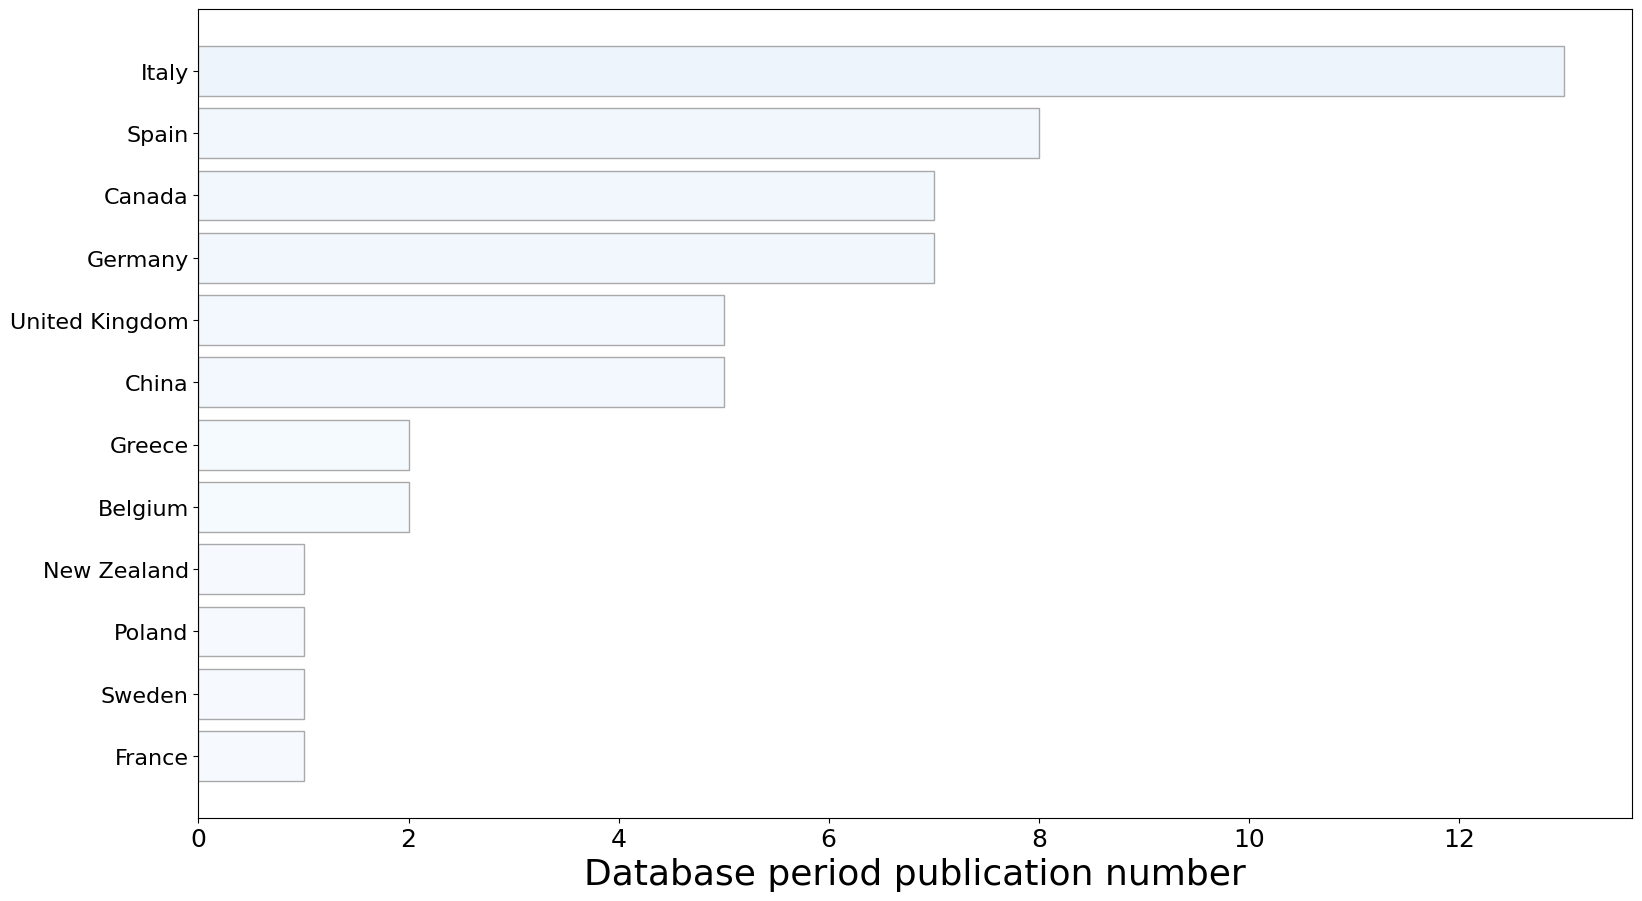

In [72]:
#Extrai os países e suas publicações
con_l = []
con_v = []
for key, value in Pais.items() :
    con_l.append(key)
    con_v.append(value)

fig, ax1 = plt.subplots()

my_cmap = plt.get_cmap('Blues')
colors = my_cmap(con_v)

ax1.barh(con_l, con_v, color = colors, edgecolor='Darkgrey')
ax1.tick_params(axis='x', labelsize=x_tick_size)
ax1.tick_params(axis='y', labelsize=y_tick_size)
    
#ax1.barh(con_l, con_v, color='grey', edgecolor='black')

ax1.set_xlabel('Database period publication number', fontsize=x_size, fontname=font)
fig.set_size_inches(18.5, 10.5)
plt.savefig('country.png', dpi=200,  bbox_inches='tight')

## Plot em barra por pais por quantidade de publicação por citação

findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.


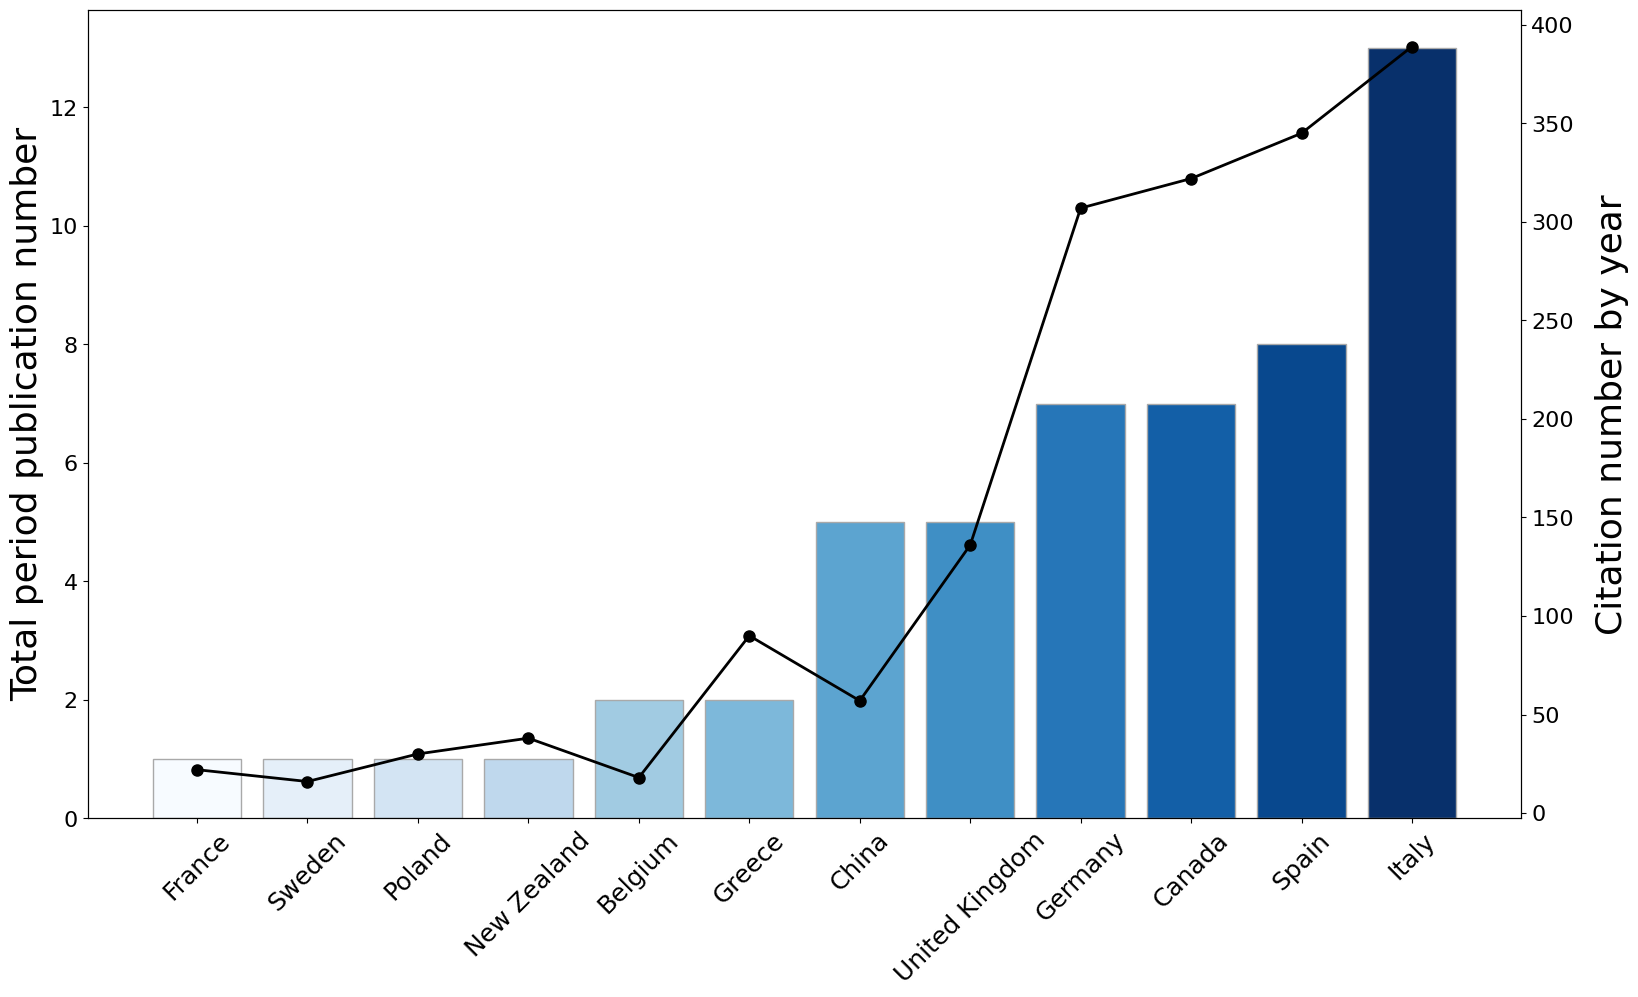

In [83]:
#Extrai os países e suas publicações
con_l = []
con_v = []
for key, value in Pais.items() :
    con_l.append(key)
    con_v.append(value)

my_cmap = cm.Blues
#colors = my_cmap(con_v)
colors = my_cmap(np.linspace(0, 1.0, len(con_v)))
    
fig, ax1 = plt.subplots()

ax1.bar(con_l, con_v, color=colors, edgecolor='Darkgrey')
#ax1.set_xlabel('Nation', fontsize = 16)
ax1.set_ylabel('Total period publication number', fontsize = y_size, fontname=font)
ax1.tick_params(axis='x', labelsize=x_tick_size, rotation = 45)
ax1.tick_params(axis='y', labelsize=y_tick_size)
d_cp_n=[]
for a in con_l:
    d_cp_n.append(d_cp[a])

    
con_l_n = []
for i in range(len(con_l)):
    con_l_n.append(con_l[i].replace(" ", "\n"))


ax2 = ax1.twinx()
ax2.plot( d_cp_n, marker='o', color = 'Black', linewidth=2, markersize=8)
ax2.set_ylabel('Citation number by year', fontsize = y_size, labelpad = 15, fontname=font)
ax2.tick_params(axis='y', labelsize=y_tick_size)


fig.set_size_inches(18.5, 10.5)
plt.savefig('country_cita.png', dpi=200,  bbox_inches='tight')

In [41]:
d_cp_n, con_v
ratio = []
for x in range(len(con_v)):
    ratio.append(d_cp_n[x]/con_v[x])

## Citação e trabalhos por anos

findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.


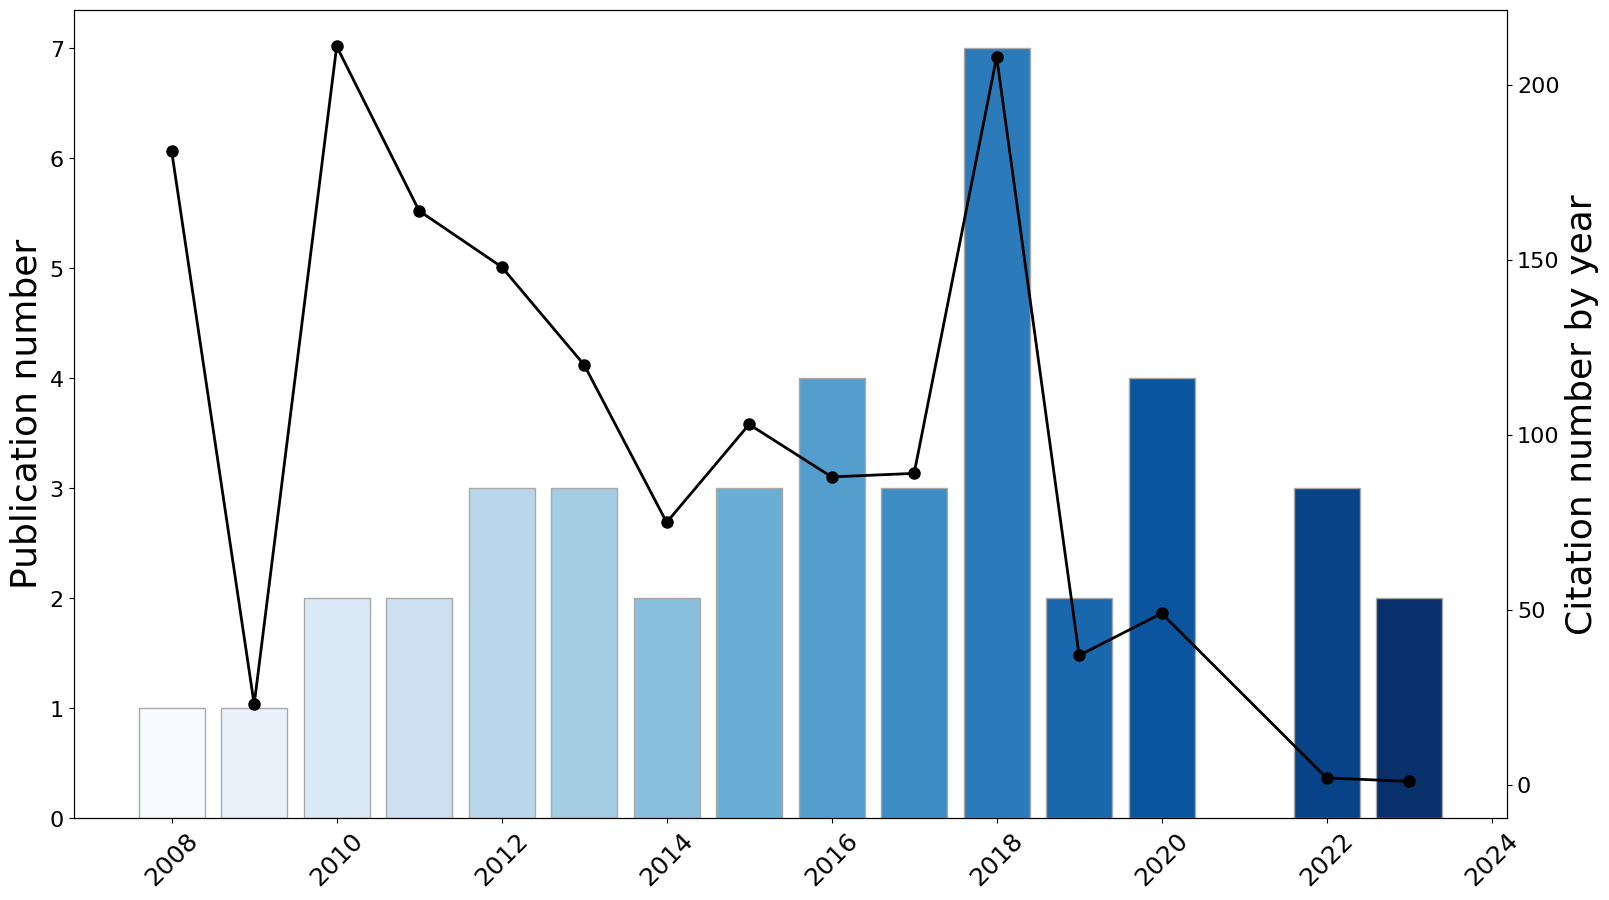

In [42]:
ano_l = []
ano_v = []
for key, value in Ano.items() :
    ano_l.append(key)
    ano_v.append(value)
    
cita_l = []
cita_v = []
for key, value in Cita.items() :
    cita_l.append(key)
    cita_v.append(value)

    
my_cmap = cm.Blues
#colors = my_cmap(con_v)
colors = my_cmap(np.linspace(0, 1.0, len(ano_v)))
    
fig, ax1 = plt.subplots()

plt.xticks(rotation=45)
ax1.bar(ano_l, ano_v, align='center',color=colors, edgecolor = 'Darkgrey')
ax1.set_ylabel('Publication number', fontsize = y_size)
ax1.tick_params(axis='x', labelsize=x_tick_size)
ax1.tick_params(axis='y', labelsize=y_tick_size)
#ax1.set_xlabel('Year', fontsize = 18)

ax2 = ax1.twinx()
ax2.plot(ano_l, cita_v, marker='o', color = 'Black',  linewidth=2, markersize=8)
ax2.tick_params(axis='y', labelsize=y_tick_size)
ax2.set_ylabel('Citation number by year', fontsize = y_size, fontname=font)
fig.set_size_inches(18.5, 10.5)
plt.savefig('doc-cita_year.png', dpi=200, bbox_inches='tight')

# Relação de revista com as citações

Precisa resolver esse problema, o plot está muito ruim
ideias:
1. Criar apelidos para os nomes grandes;

findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.


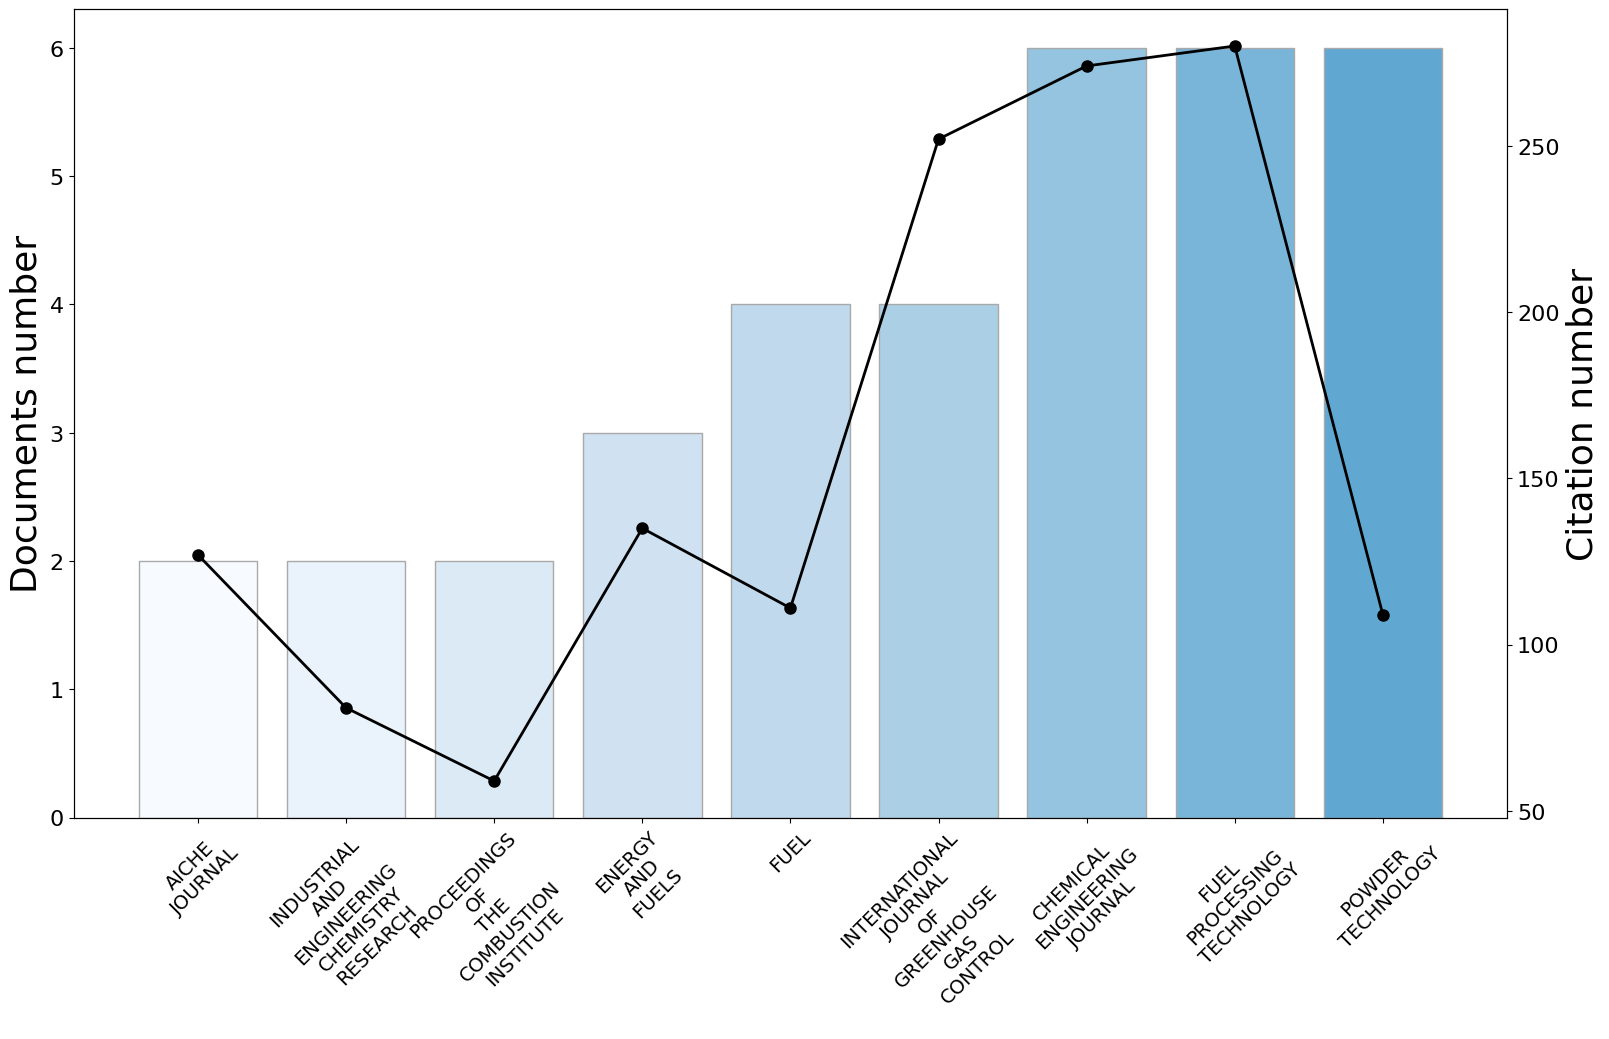

In [43]:
rev_n_l = []
rev_n_v = []
for key, value in rev_n.items() :
    rev_n_l.append(key)
    rev_n_v.append(value)
    
rev_l = []
rev_v = []
for key, value in rev_cita.items() :
    rev_l.append(key)
    rev_v.append(value)
###Teste####

rev_l_n = []
rev_n_l_n = []
for i in range(len(rev_l)):
    rev_l_n.append(rev_l[i].replace(" ", "\n"))
    rev_n_l_n.append(rev_n_l[i].replace(" ", "\n"))
###FImTeste###

cit_num = []
for x in rev_n_l_n:
    for y in range(len(rev_l_n)):
        if x == rev_l_n[y]:
            cit_num.append(rev_v[y])

my_cmap = cm.Blues
#colors = my_cmap(con_v)
colors = my_cmap(np.linspace(0, 1.0, len(rev_v)))
    
fig, ax1 = plt.subplots()

ax1.bar(rev_n_l_n[7:], rev_n_v[7:], align='center',color=colors, edgecolor = 'Darkgrey')
ax1.tick_params(axis='x', labelsize=14, rotation = 45)
ax1.tick_params(axis='y', labelsize=y_tick_size)
ax1.set_ylabel('Documents number', fontsize = y_size, fontname=font)

ax2 = ax1.twinx()

ax2.plot(rev_n_l_n[7:], cit_num[7:],marker='o', color='Black', linewidth=2, markersize=8)
ax2.set_ylabel('Citation number', fontsize = y_size, fontname=font)
ax2.tick_params(axis='y', labelsize=y_tick_size)
fig.set_size_inches(18.5, 10.5)
plt.savefig('journal-cita.png', dpi=200, bbox_inches='tight')

In [44]:

ratio_j = []
for x in range(len(cit_num)):
    ratio_j.append(cit_num[x]/rev_n_v[x])

# Plot das 5 palavras com maior número de citações

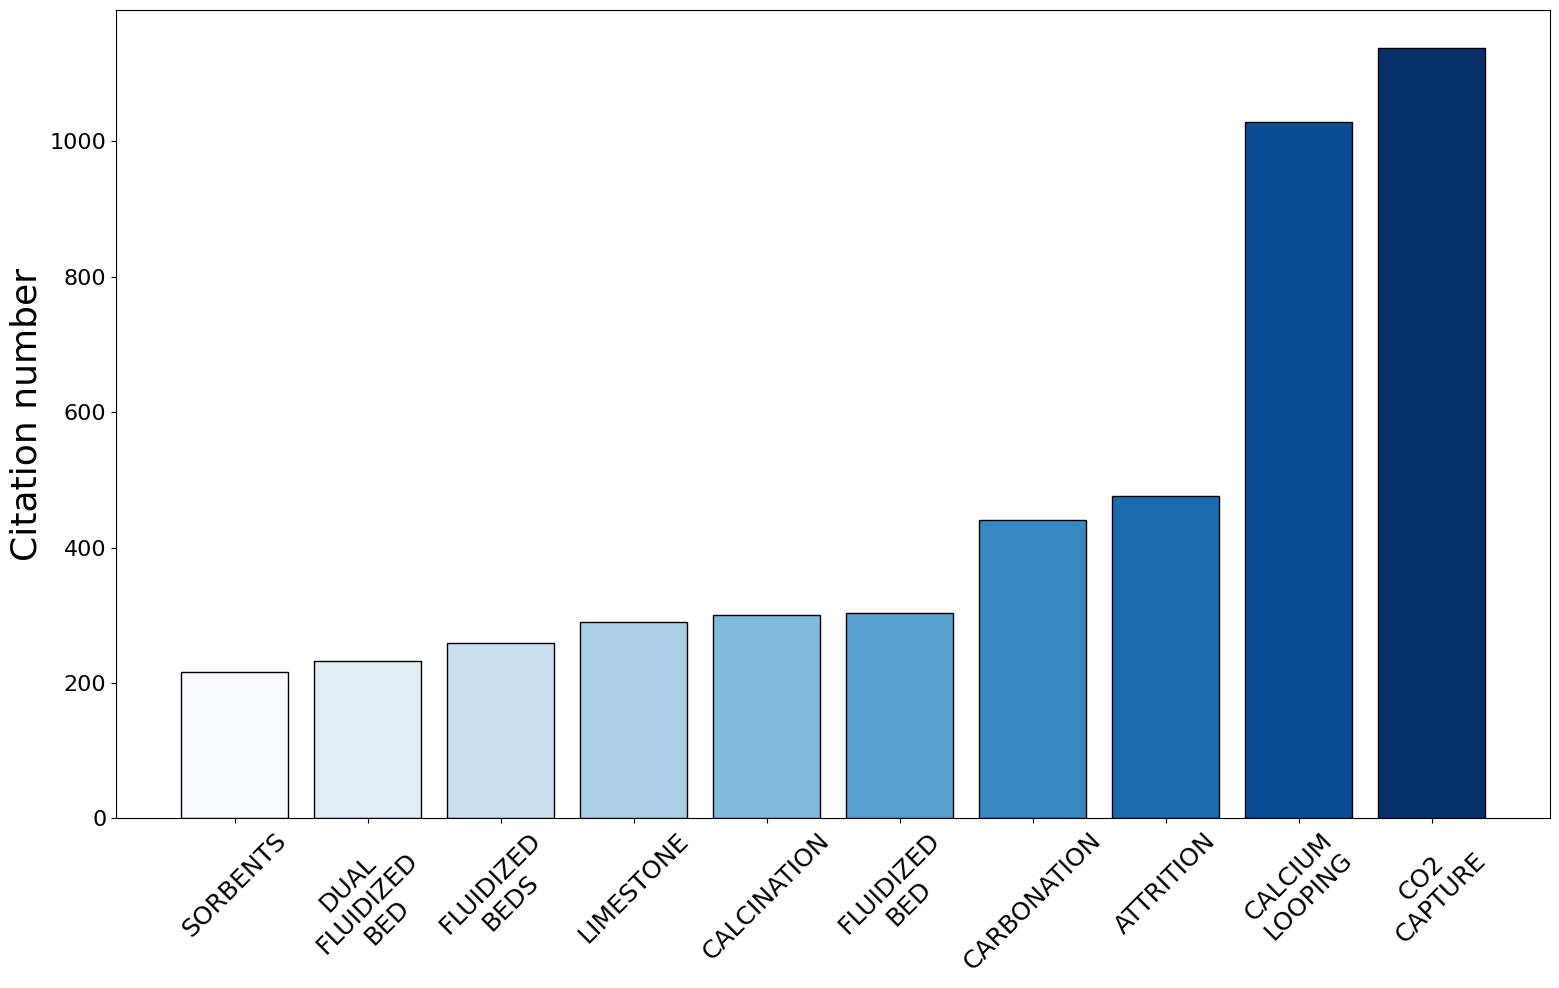

In [45]:
kwcita_l = []
kwcita_v = []
for key, value in d.items() :
    kwcita_l.append(key)
    kwcita_v.append(value)
    
my_cmap = cm.Blues
#colors = my_cmap(con_v)
colors = my_cmap(np.linspace(0, 1.0, len(kwcita_v[-10:])))

kwcita_l_n = []
for i in range(len(kwcita_l)):
    kwcita_l_n.append(kwcita_l[i].replace(" ", "\n"))
    
fig, ax1 = plt.subplots()

plt.xticks(rotation=45)
ax1.bar(kwcita_l_n[-10:], kwcita_v[-10:], align='center',color=colors, edgecolor = 'black')
ax1.tick_params(axis='x', labelsize=x_tick_size)
ax1.tick_params(axis='y', labelsize=y_tick_size)
#ax1.pie(kwcita_v[-5:], labels=kwcita_l[-5:], autopct='%1.1f%%',
#        shadow=False, startangle=90)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_ylabel('Citation number', fontsize = y_size)
fig.set_size_inches(18.5, 10.5)
plt.savefig('kw.png', dpi=200, bbox_inches='tight')

## Plot das citações dos 5 maiores autores para as 5 maiores palavra chave 

AttributeError: 'Axes3D' object has no attribute 'w_xaxis'

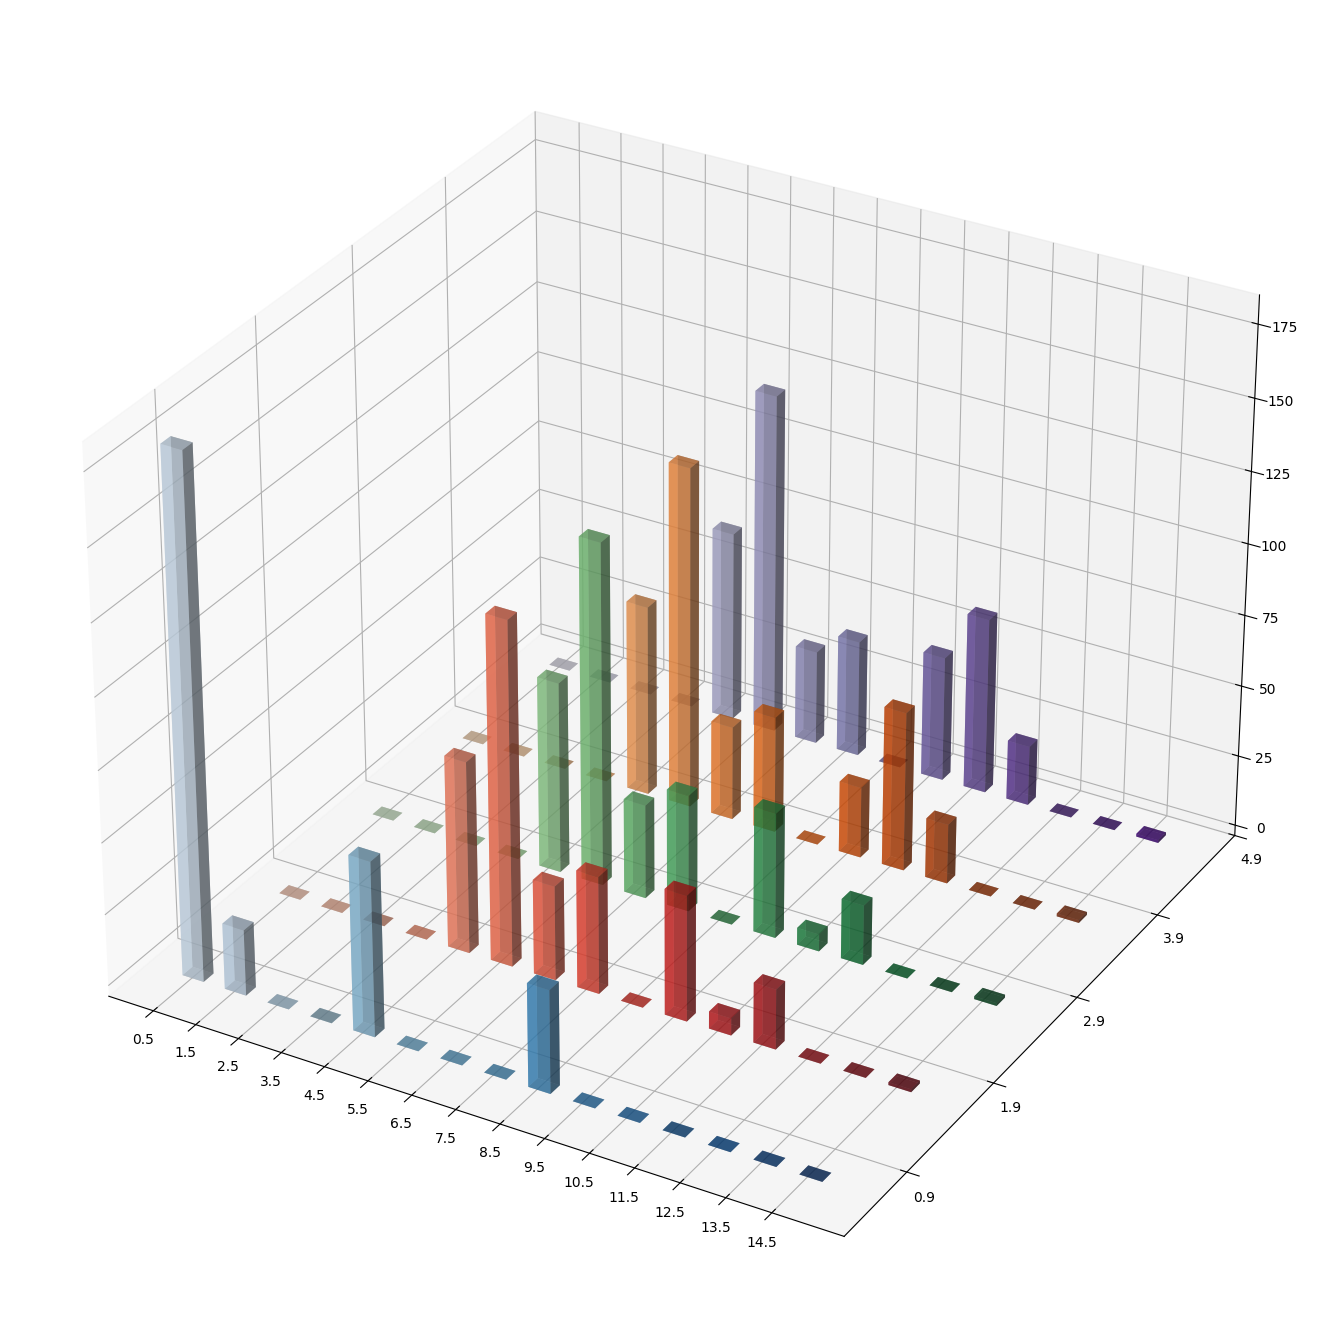

In [47]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
# setup the figure and axes
fig = plt.figure()
ax1 = fig.add_subplot(projection='3d')
fig.set_size_inches(25, 17)

xpos = np.arange(len(ano_l))    # Set up a mesh of positions
ypos = np.arange(len(aut_l[-5:]))
yposM, xposM = np.meshgrid(ypos+0.5, xpos+0.5)
zpos = np.zeros([len(ano_l), len(aut_l[-5:])]).flatten()


dx = 0.5 * np.ones_like(zpos)
dy= 0.1 * np.ones_like(zpos)
dz = cita5


values = np.linspace(0.2, 1., len(ano_l))
cmaps = [cm.Blues, cm.Reds, cm.Greens, cm.Oranges, cm.Purples]
colors = np.hstack([c(values) for c in cmaps]).reshape(-1, 4)

ax1.bar3d(xposM.ravel(),yposM.ravel(),zpos,dx,dy,dz, color=colors, alpha=0.6, shade=True)


ticks_x = np.arange(0.5, len(ano_l), 1)
ax1.set_xticks(ticks_x)
ticks_y=np.arange(0.9,5,1)
ax1.set_yticks(ticks_y)


ax1.w_xaxis.set_ticklabels(ano_l)
ax1.w_yaxis.set_ticklabels(aut_l[-5:])
ax1.tick_params(axis='x', labelsize=x_tick_size, rotation = 10)
ax1.tick_params(axis='y', labelsize=y_tick_size, pad=19, rotation =5)
ax1.tick_params(axis='z', labelsize=z_tick_size, pad =5)


#ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('Author', fontsize=y_size, labelpad=45)
ax1.set_zlabel('Citation number', fontsize=z_size, labelpad=10)
#plt.show()
plt.savefig('original.png', dpi=200, bbox_inches='tight')

AttributeError: 'Axes3D' object has no attribute 'w_xaxis'

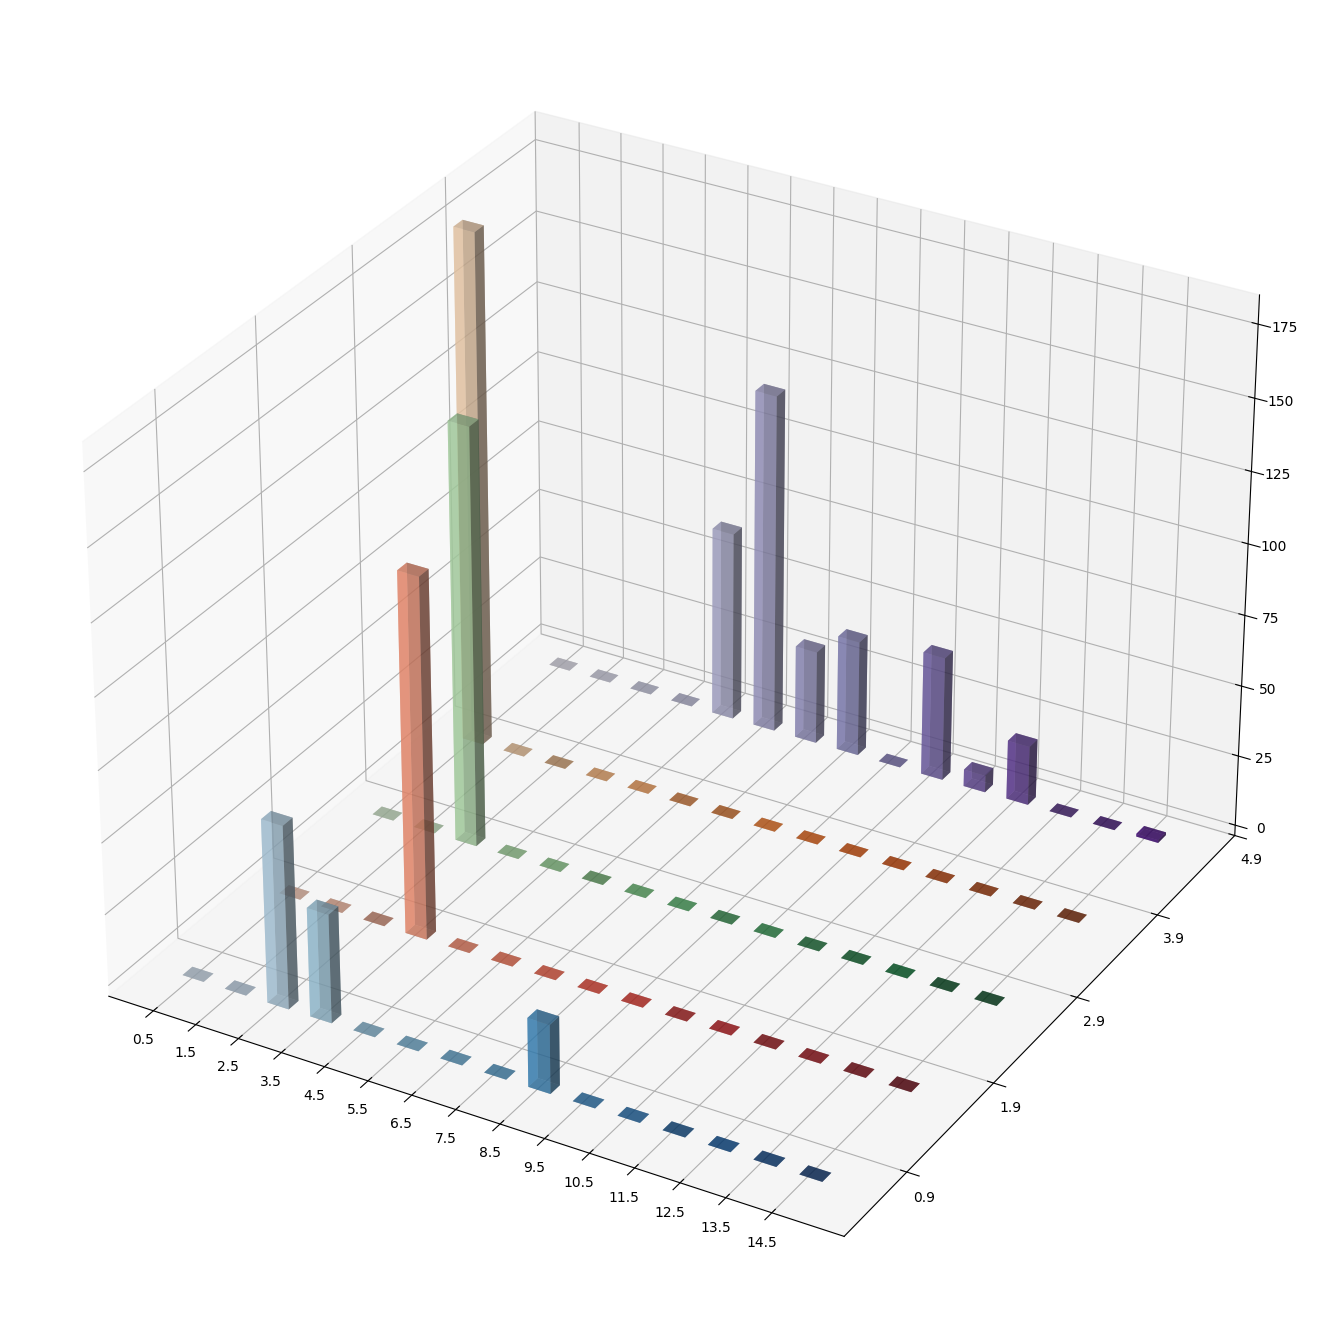

In [48]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
# setup the figure and axes
fig = plt.figure()
ax1 = fig.add_subplot(projection='3d')
fig.set_size_inches(25, 17)

xpos = np.arange(len(ano_lp))    # Set up a mesh of positions
ypos = np.arange(len(aut_lp[-5:]))
yposM, xposM = np.meshgrid(ypos+0.5, xpos+0.5)
zpos = np.zeros([len(ano_lp), len(aut_lp[-5:])]).flatten()


dx = 0.5 * np.ones_like(zpos)
dy= 0.1 * np.ones_like(zpos)
dz = cita5p


values = np.linspace(0.2, 1., len(ano_lp))
cmaps = [cm.Blues, cm.Reds, cm.Greens, cm.Oranges, cm.Purples]
colors = np.hstack([c(values) for c in cmaps]).reshape(-1, 4)

ax1.bar3d(xposM.ravel(),yposM.ravel(),zpos,dx,dy,dz, color=colors, alpha=0.6, shade=True)


ticks_x = np.arange(0.5, len(ano_lp), 1)
ax1.set_xticks(ticks_x)
ticks_y=np.arange(0.9,5,1)
ax1.set_yticks(ticks_y)


ax1.w_xaxis.set_ticklabels(ano_lp)
ax1.w_yaxis.set_ticklabels(aut_lp[-5:])


ax1.tick_params(axis='x', labelsize=x_tick_size, rotation = 10)
ax1.tick_params(axis='y', labelsize=y_tick_size, pad=15, rotation =5)
ax1.tick_params(axis='z', labelsize=z_tick_size, pad =5)


#ax1.set_xlabel('Year', fontsize=20)
ax1.set_ylabel('Author', fontsize=y_size, labelpad=45)
ax1.set_zlabel('Citation number', fontsize=z_size, labelpad=10)
plt.savefig('primeiro.png', dpi=200, bbox_inches='tight')

AttributeError: 'Axes3D' object has no attribute 'w_xaxis'

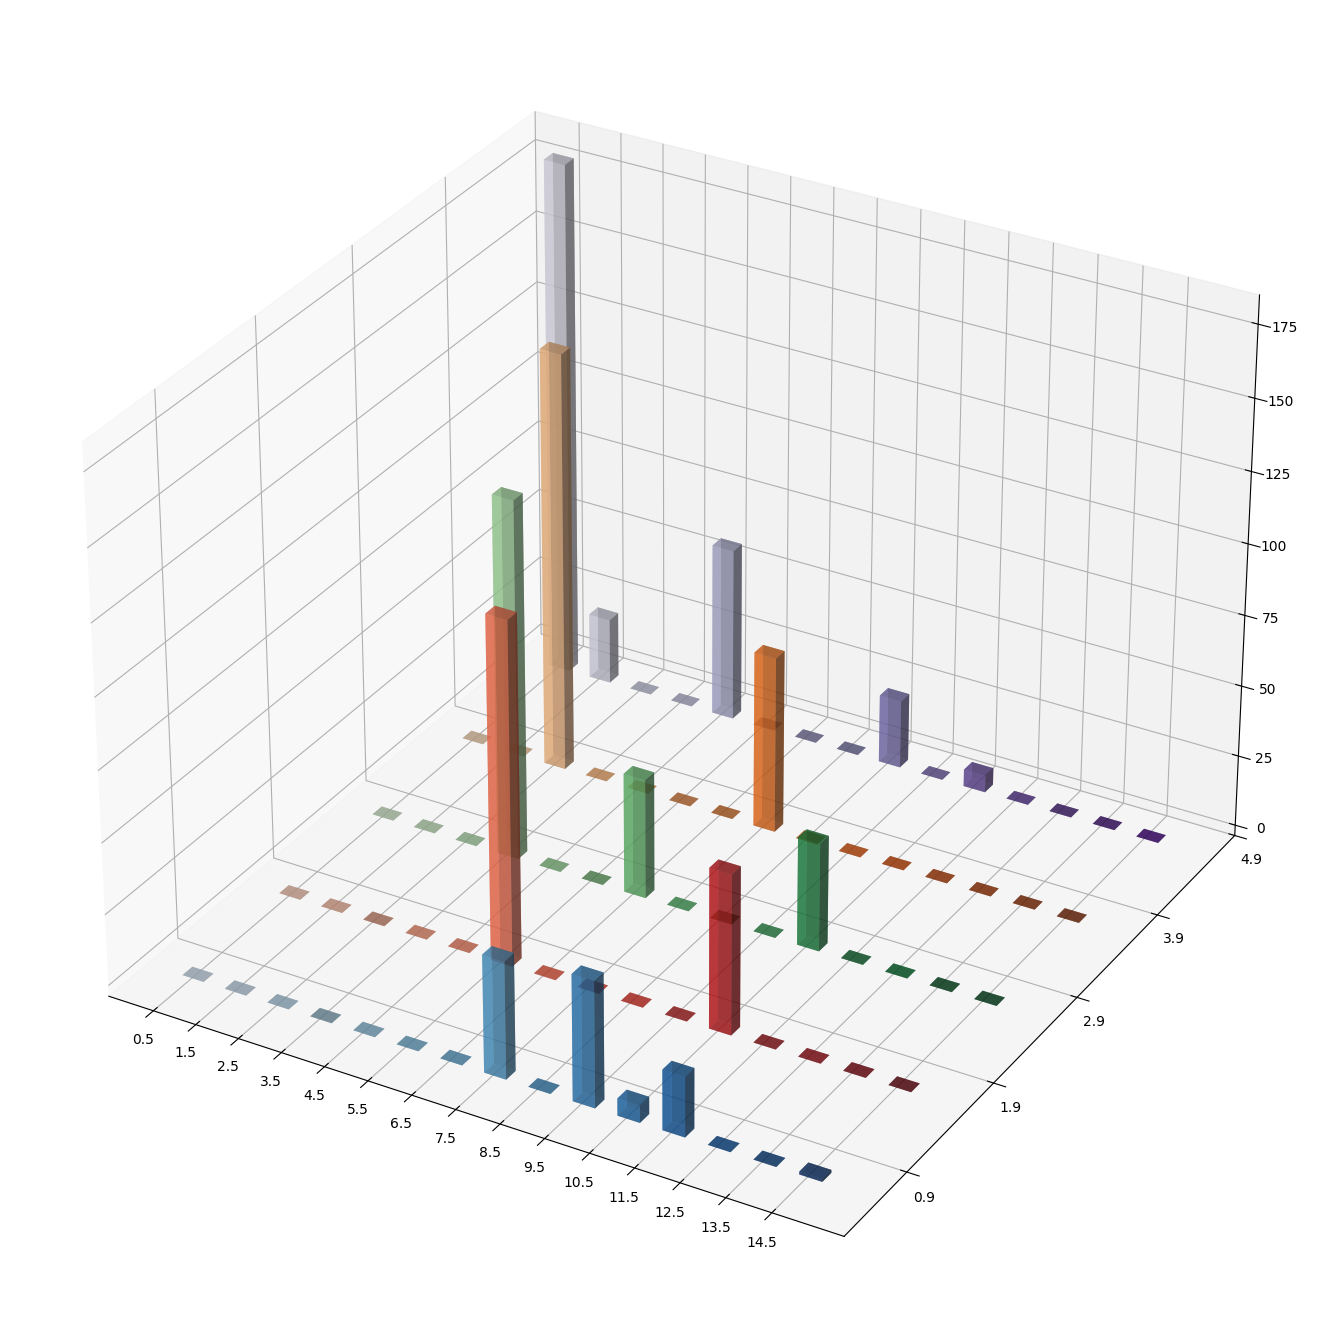

In [49]:
#Ultimo
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
# setup the figure and axes
fig = plt.figure()
ax1 = fig.add_subplot(projection='3d')
fig.set_size_inches(25, 17)

xpos = np.arange(len(ano_lu))    # Set up a mesh of positions
ypos = np.arange(len(aut_lu[-5:]))
yposM, xposM = np.meshgrid(ypos+0.5, xpos+0.5)
zpos = np.zeros([len(ano_lu), len(aut_lu[-5:])]).flatten()


dx = 0.5 * np.ones_like(zpos)
dy= 0.1 * np.ones_like(zpos)
dz = cita5u


values = np.linspace(0.2, 1., len(ano_lu))
cmaps = [cm.Blues, cm.Reds, cm.Greens, cm.Oranges, cm.Purples]
colors = np.hstack([c(values) for c in cmaps]).reshape(-1, 4)

ax1.bar3d(xposM.ravel(),yposM.ravel(),zpos,dx,dy,dz, color=colors, alpha=0.6, shade=True)


ticks_x = np.arange(0.5, len(ano_lu), 1)
ax1.set_xticks(ticks_x)
ticks_y=np.arange(0.9,5,1)
ax1.set_yticks(ticks_y)

ax1.w_xaxis.set_ticklabels(ano_lu)
ax1.w_yaxis.set_ticklabels(aut_lu[-5:])

ax1.tick_params(axis='x', labelsize=x_tick_size, rotation = 10)
ax1.tick_params(axis='y', labelsize=y_tick_size, pad=25, rotation =5)
ax1.tick_params(axis='z', labelsize=z_tick_size, pad =5)

plt.yticks(rotation = 5)

#ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Autor', fontsize=y_size, labelpad=65)
ax1.set_zlabel('Número de citações', fontsize=z_size, labelpad=10)
#plt.show()
plt.savefig('ws_2022.png', dpi=200, bbox_inches='tight')

# COreferences anlysis artigo

In [54]:
import re
def flatten(l):
    return [item for sublist in l for item in sublist]

dfs['Authors'] = dfs['Authors'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
aut_s = dfs['Authors']
aut_s = [aut_s.upper() for aut_s in aut_s] # deixa tudo maiusculo
    
#creating list of authors

aut_sp=[]
for i in range(len(aut_s)):
    aut_sp.append(aut_s[i].split(', '))
#list of author flattened
aut_f = flatten(aut_sp)

#ajustando virgula
aut_spv =[]
for i in range(len(aut_sp)):
    vari=[]
    for j in range(len(aut_sp[i])):
        vari.append(aut_sp[i][j].replace(' ', ', '))
    aut_spv.append(vari)


    
    
# fazendo a lista de autores das references
ref = dfs['References'].values
ref_sp = []
ref_sp_2 = []
#separa o array para cada citção
for i in range(len(ref)):
    ref_sp.append(ref[i].split('; '))

#separa os autores e lida com os problema da separação
for i in range(len(ref_sp)):    
    for j in range(len(ref_sp[i])):
        ref_sp[i][j]=ref_sp[i][j].split('., ')

for i in range(len(ref_sp)):
    for j in range(len(ref_sp[i])):
        for k in range(len(ref_sp[i][j])):
            ref_sp[i][j][k] = ref_sp[i][j][k] + '.'

for i in range(len(ref_sp)):
    for j in range(len(ref_sp[i])):
        for k in range(len(ref_sp[i][j])):
            if len(ref_sp[i][j][k]) >= 25:
                ref_sp[i][j][k] = 'jujuba'
            elif len(re.findall('[0-9]+', ref_sp[i][j][k])) != 0:
                #print(i,j,k, 'reg')
                ref_sp[i][j][k] = 'jujuba'
            else:
                continue

b1=[]

for i in range(len(ref_sp)):
    a = ref_sp[i]
    b3 = []
    for j in range(len(ref_sp[i])):
        b = ref_sp[i][j]
        b2=[]
        for k in range(len(ref_sp[i][j])):
            if ref_sp[i][j][k] != 'jujuba':
                b2.append(ref_sp[i][j][k].upper())
            else:
                continue
                
        b3.append(b2)
    b3=flatten(b3)    
    b1.append(b3)

In [55]:
#determining the relationships for each node
#every time two 'nodes' appear together they form a relationship

rela = []
for i in range(len(aut_spv)):
    rel = []
    for j in range(len(aut_spv[i])):
        for k in range(len(b1[i])):
            if aut_spv[i][j] == b1[i][k]:               
                rel.append([aut_spv[i][j],b1[i][j]])
    rela.append(rel)
rela_f = flatten(rela)

rela_limpo = []
for i in range(len(rela_f)):
    if rela_f[i][0] != rela_f[i][1]:
        rela_limpo.append(rela_f[i])

# Criando nodes

In [56]:

#removendo equals
aut_spvc = flatten(aut_spv)
aut_spvclimpo = []
for i in aut_spvc:
    if i not in aut_spvclimpo:
        aut_spvclimpo.append(i) #array de nodes

        
        
        
b1_flat = flatten(b1)
b1_limpo = []
for i in b1_flat:
    if i not in b1_limpo:
        b1_limpo.append(i) #array de nodes

#comparando ambas as listas de autores
aut_comb = []
aut_comb = aut_spvclimpo


for i in aut_spvclimpo:
    for j in b1_limpo:
        if (i != j) and (j not in aut_comb):
            aut_comb.append(j) #list de todos os nodes

In [57]:
rela_ff = flatten(rela_limpo)

new_author = set(rela_ff)

new_author = list(new_author)

In [58]:
#creating the graph
import networkx as nx
G=nx.Graph()
nodes = new_author
G.add_nodes_from(nodes)

for i, j in rela_limpo:
    if (not (G.has_edge(i,j) or G.has_edge(j,i))):
        G.add_edge(i, j, weight=1)
    else:
        G.edges[i, j]["weight"] += 1
        
rel_weights = [data for i, j, data in G.edges.data("weight")]

ModuleNotFoundError: No module named 'networkx'

In [ ]:
df = pd.DataFrame(index=G.nodes(), columns=G.nodes())
for row, data in nx.shortest_path_length(G):
    for col, dist in data.items():
        df.loc[row,col] = dist +5

df = df.fillna(df.max().max())

pos = nx.kamada_kawai_layout(G, dist=df.to_dict())
# nodes
nx.draw_networkx_nodes(G, pos, node_size=90, node_color= 'dodgerblue', edgecolors = 'dodgerblue', margins = 0.5)

# edges
#nx.draw_networkx_edges(G, pos, width=6)
#nx.draw_networkx_edges(G, pos, width=5, edge_color='#93B550')
weighted_edges = []
for weight in rel_weights:
    weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
    #4 e. I think multiplying by [num_nodes/sum(all_weights)] makes the graphs edges look cleaner
    width = weight*len(nodes)*3.0/sum(rel_weights)
    nx.draw_networkx_edges(G,pos,edgelist = weighted_edges, width = width*1, edge_color = 'green')

##C68E17
# node labels
nx.draw_networkx_labels(G, pos, font_size=24, font_weight = 'bold' , font_family="monospace",verticalalignment = 'top', horizontalalignment = 'right', font_color = 'black')

ax = plt.gca()
ax.margins(0.2)
plt.axis("off")
#plt.tight_layout()
#plt.show()
#plt.rcParams["figure.figsize"] = (30,25)
plt.savefig('bang.jpeg', dpi=200, bbox_inches='tight')

In [ ]:
pos = nx.spring_layout(G)
# nodes
nx.draw_networkx_nodes(G, pos, node_size=280,  node_color= 'dodgerblue', edgecolors = 'dodgerblue',  margins = 0.8)

# edges
#nx.draw_networkx_edges(G, pos, width=6)
#nx.draw_networkx_edges(G, pos, width=5, edge_color='#93B550')
weighted_edges = []
for weight in rel_weights:
    weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
    #4 e. I think multiplying by [num_nodes/sum(all_weights)] makes the graphs edges look cleaner
    width = weight*len(nodes)*3.0/sum(rel_weights)
    nx.draw_networkx_edges(G,pos,edgelist = weighted_edges, width = width*1, edge_color = 'mediumslateblue')


# node labels
nx.draw_networkx_labels(G, pos, font_size=18, font_weight = 'bold' , font_family="monospace", verticalalignment = 'center', horizontalalignment = 'left', font_color = 'midnightblue')


ax = plt.gca()
ax.margins(0.2)
plt.axis("off")
#plt.tight_layout()
#plt.show()
#plt.rcParams["figure.figsize"] = (30,25)
#plt.savefig('bang.png', dpi=500)

# Biblioteca de funções

In [39]:
def find_country_s(df):
    '''
    Função para extração dos paises parao DF do Scopus. 
    O data framae é o argumento de entrada da função;
    A função só funciona se os paises estiverem na aba affiliations como o padrão da scopus
    recomendado adicionar como country para o data frame conforme exemplo

    '''
    w = []
    x = []
    for c in range(len(df['Affiliations'].values)):  
        a = df['Affiliations'].values[c]
        x = a.split(';')
        y = []
        w.append([])
        for d in range(len(x)):
            y.append(x[d].split(','))
        for b in range(len(y)):
            m = y[b][-1]        
            w[c].append(m)
    #print(w)      
    #for i in range (len(w)):
    #    w[i] = set(w[i])
        
    return(w)

In [40]:
def remove_equals(df, df2):
    '''
    identificando e retirando os iguais

    A função tem input dos dois dataframes a serem utilizados 
    Retorna o Dataframe sem os iguais
    '''
    s_doi = df['DOI'].values
    w_doi = df2['DOI'].values
    for x in range(len(s_doi)):
        for y in range(len(w_doi)):
            if s_doi[x] == w_doi[y]:            
                df2 = df2.drop([y], axis=0)
    return(df2) 